<h1 align="center">YRoots</h1>

YRoots is a numerical rootfinding package which can be used to solve multivariate systems of nonlinear equations, like those arising from optimization problems in finding critical points. While other rootfinders exist, YRoots is unique in that it finds all the roots in a compact interval.

Download YRoots from github to begin using the package.

  ```git
      git clone https://github.com/tylerjarvis/RootFinding/tree/master   
  ```
  
We demonstrate here how to use YRoots.

In [1]:
#imports
import numpy as np
import yroots as yr

#plotting tools
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#autoreload
%load_ext autoreload
%autoreload 2

## Multivariate Functions

To find the commmon zeros of a set of multivariate functions, input a list of functions and a search interval. The syntax for this is:

```python
yr.solve(funcs, a, b)
```

where `funcs` is a list of $n$ **vectorized** functions in $n$ variables and `a` and `b` are array-like objects of upper and lower bounds (respectively) of the search domain in each dimension. For bivariate systems, the optional parameter `plot` allows the user to graph the zero-loci and roots of the functions. The parameter `polish` can improve the accuracy for multivariate systems.

YRoots returns an numpy array where each row is a root.

### Two variables
Here is an example of YRoots solving the bivariate system of equations

$$0 = \sin(xy) + x\log(y+3) - x^2 + \frac{1}{y-4}$$
$$6 = \cos(3xy) + e^{\frac{3y}{x-2}} - x.$$

Solutions of the system subject to the constrains $-1\leq x\leq0,-2\leq y\leq1$ are common roots of the functions

$$f(x,y) = \sin(xy) + x\log(y+3) - x^2 + \frac{1}{y-4} $$
$$g(x,y) = \cos(3xy) + e^{\frac{3y}{x-2}} - x - 6$$ on the search domain $[-1,0]\times[-2,1]$.

Percent Finished: 100%       
Total intervals checked was 34
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [ 5.88 70.59  0.   23.53]


<Figure size 7200x4800 with 0 Axes>

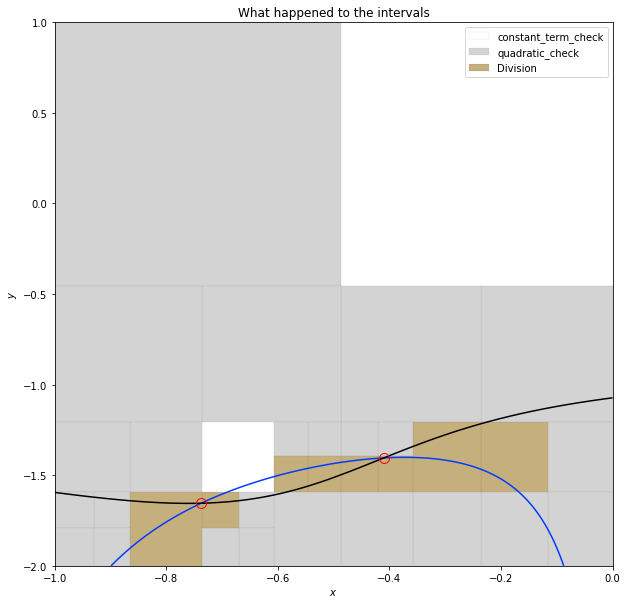

CPU times: user 928 ms, sys: 38.8 ms, total: 966 ms
Wall time: 701 ms


(2, 8.344852586716911e-12, 7.819256353513993e-11)

In [44]:
#define the functions
f = lambda x,y : np.sin(x*y) + x*np.log(y+3) - x**2 + 1/(y-4)
g = lambda x,y : np.cos(3*x*y) + np.exp(3*y/(x-2)) - x - 6

#search domain bounds
a = [-1,-2] #lower bounds on x and y
b = [0,1] #upper bounds on x and y

#time
%time roots = yr.solve([f,g], a, b, plot=True, plot_intervals=True, polish=True)

#show the number of roots and maximal residuals
roots.shape[0],np.max(np.abs(f(roots[:,0],roots[:,1]))),np.max(np.abs(g(roots[:,0],roots[:,1])))

Here is a slightly more complex system on the search domain $[-1,1]\times[-1,1]$ from [this paper](https://link.springer.com/article/10.1007/s00211-014-0635-z).

$$f=\sin(30x−y/30)+y$$
$$g=\cos(x/30−30y)−x$$

Percent Finished: 100%         
Total intervals checked was 2482
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [ 6.45 77.2   0.   16.36]


<Figure size 7200x4800 with 0 Axes>

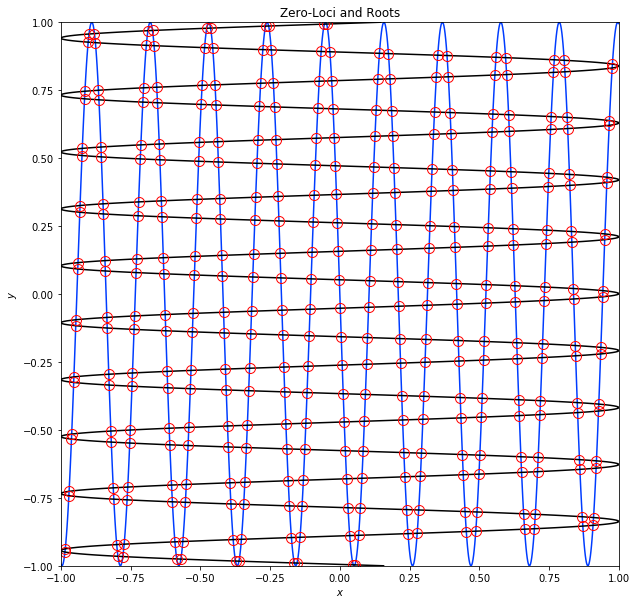

CPU times: user 10.6 s, sys: 155 ms, total: 10.7 s
Wall time: 10.6 s


(363, 9.028765235452596e-11, 9.02386255996479e-11)

In [45]:
#functions
f = lambda x,y: np.sin(30*x-y/30)+y
g = lambda x,y: np.cos(x/30-30*y)-x
#search domain
a = [-1,-1] #lower
b = [1,1] #upper
#time
%time roots =  yr.solve([f,g], a, b,plot=True, polish=True)

#show the number of roots and maximal residuals #363 or 362 Roots
roots.shape[0],np.max(np.abs(f(roots[:,0],roots[:,1]))),np.max(np.abs(g(roots[:,0],roots[:,1])))

#TODO: Why are we missing a root around (1,.75) and (0,-1)? 
# If we mess with the parameters for good_roots_nd, we get way to many roots

The correct number of roots is 363

Here is a more complicated bivariate system on the region $[-5,5]\times[-5,5]$.

$$f(x,y) = \sin(20x+y)$$
$$g(x,y) = \cos(x^2+xy)-\frac{1}{4}$$

Notice that YRoots correctly avoids points that are nearly roots but are not roots.

Percent Finished: 100%         
Total intervals checked was 7633
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [ 7.81 79.31  0.   12.88]


<Figure size 7200x4800 with 0 Axes>

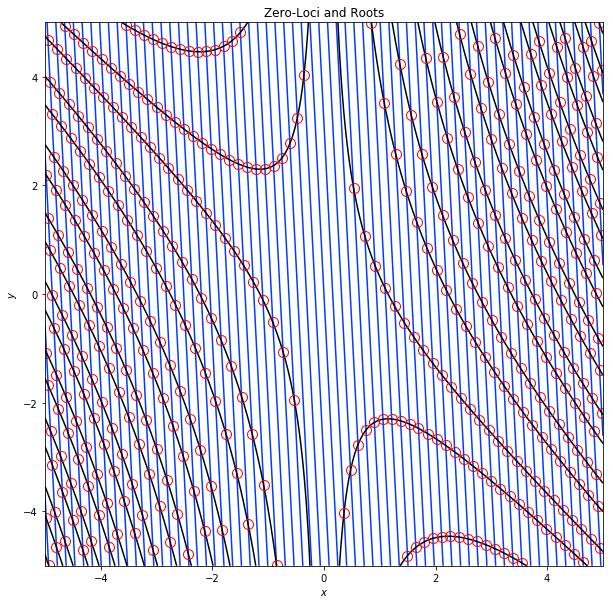

CPU times: user 27.5 s, sys: 385 ms, total: 27.9 s
Wall time: 28.3 s


(452, 1.6009311982014894e-10, 7.97533705743092e-11)

In [46]:
#define functions and search domain
f = lambda x,y : np.sin(20*x+y)
g = lambda x,y : np.cos(x**2+x*y)-.25
a = [-5,-5]
b = [5,5]

#solve and time
%time roots = yr.solve([f,g], a, b,plot=True, polish=True)

#show the number of roots and maximal residuals #452 Roots
roots.shape[0],np.max(np.abs(f(roots[:,0],roots[:,1]))),np.max(np.abs(g(roots[:,0],roots[:,1])))

The correct number of roots is 452

Here is an ill-conditioned system from [this paper](https://link.springer.com/article/10.1007/s00211-014-0635-z) on the domain $[-1,1]\times[-1,1]$.

$$\Pi_{i=0}^{10}(y^2(4y^2−\frac{i}{10})−x^2(4x^2−1)) = 0$$
$$256(x^2+y^2)^2+288(x^2+y^2)−512(x^3−3xy^2)=27$$

Percent Finished: 100%         
Total intervals checked was 2973
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [27.51 67.51  0.    4.98]


<Figure size 7200x4800 with 0 Axes>

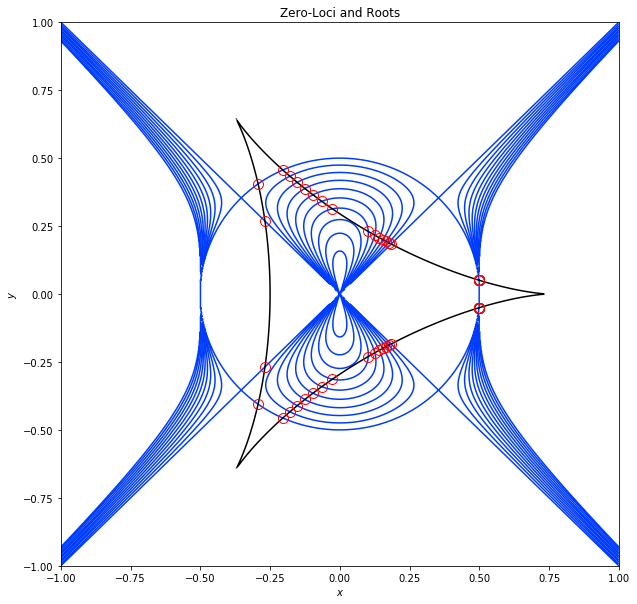

CPU times: user 5.54 s, sys: 194 ms, total: 5.73 s
Wall time: 5.22 s


(54, 1.569888227274273e-22, 2.268762955282e-11)

In [144]:
#functions
f = lambda x,y: np.prod([y**2*(4*y**2-i/10)-x**2*(4*x**2-1) for i in range(11)],axis=0)
g = lambda x,y: 256*(x**2+y**2)**2+288*(x**2+y**2)-512*(x**3-3*x*y**2)-27
#search domain
a = [-1.,-1.] #lower
b = [1.,1.] #upper
#time
%time roots = yr.solve([f,g], a, b,plot=True, plot_intervals=False, polish=True)

#show the number of roots and maximal residuals
roots.shape[0],np.max(np.abs(f(roots[:,0],roots[:,1]))),np.max(np.abs(g(roots[:,0],roots[:,1])))

#TODO: Why are we missing so many roots here? Is there a bug in division or the base case?

The correct number of roots is 54

### Using YRoots for optimization

YRoots can also be used for optimization problems, since the common roots of the partial derivatives of a function are critical points. 

The Rosenbrock function is often used as a performace test for optimization algorithms. It is well suited to be optimized with YRoots. 

$$f(x,y) = (1-x)^2 + 100(y-x^2)^2$$

In [139]:
#define function
f = lambda x,y: (1-x)**2 + 100*(y-x**2)**2

#partial derivatives
fx = lambda x,y: 2*(x-1) + 200*(y-x**2)*(-2*x)
fy = lambda x,y: 200*(y-x**2)

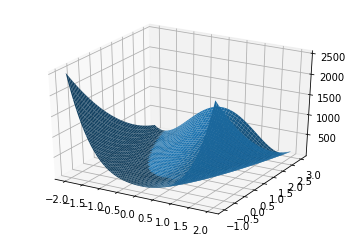

In [140]:
#3D plot of the function to optimize
x = np.linspace(-2,2, 1000)
y = np.linspace(-1,3, 1000)
X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(X, Y, f(X,Y))

Percent Finished: 100%         
Total intervals checked was 1675
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [ 0.   70.81  0.   29.19]


<Figure size 7200x4800 with 0 Axes>

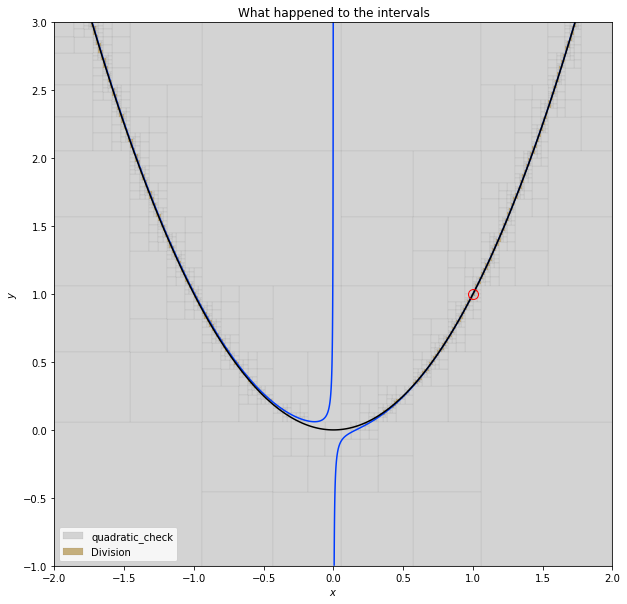

CPU times: user 9.16 s, sys: 132 ms, total: 9.29 s
Wall time: 9.18 s


In [141]:
#find common roots
low = [-2.,-1]
upp = [2.,3.]
%time zeros = yr.solve([fx,fy],low,upp,plot=True, polish=True, plot_intervals=True)

In [103]:
#evaluate at critical points
values = f(zeros[:,0],zeros[:,1])
#report mimima and minimizers
mimimizer = np.argmin(values)
values[mimimizer], zeros[mimimizer]

(2.842993662331833e-22, array([1., 1.]))

Nick Trefethen's Hundred-dollar, Hundred-digit Challenge problems include finding the minimum of the function 
$$f(x,y) = e^{\sin(50x)} + \sin(60e^y) + \sin(70 \sin (x))+\sin(\sin(80y)) - \sin(10(x+y)) + 1/4(x^2 + y^2).$$

(Problem 4, [here](https://en.wikipedia.org/wiki/Hundred-dollar,_Hundred-digit_Challenge_problems))

In [104]:
#define function
f = lambda x,y : np.exp(np.sin(50*x)) + np.sin(60*np.exp(y)) + np.sin(70*np.sin(x)) + np.sin(np.sin(80*y)) \
                - np.sin(10*(x+y)) + .25 * (x**2 + y**2)

#partial derivatives
fx = lambda x,y : 50*np.cos(50*x)*np.exp(np.sin(50*x)) + 70*np.cos(x)*np.cos(70*np.sin(x)) - 10*np.cos(10*(x+y)) + .5 * x
fy = lambda x,y : 60*np.exp(y)*np.cos(60*np.exp(y)) + 80*np.cos(80*y)*np.cos(np.sin(80*y))- 10*np.cos(10*(x+y)) + .5 * y

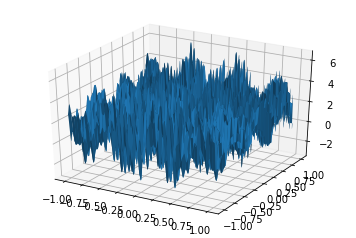

In [105]:
#3D plot of the function to optimize
x = np.linspace(-1,1, 1000)
X, Y = np.meshgrid(x, x)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(X, Y, f(X,Y))

Percent Finished: 100%         
Total intervals checked was 39326
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [10.73 82.07  0.    7.2 ]


<Figure size 7200x4800 with 0 Axes>

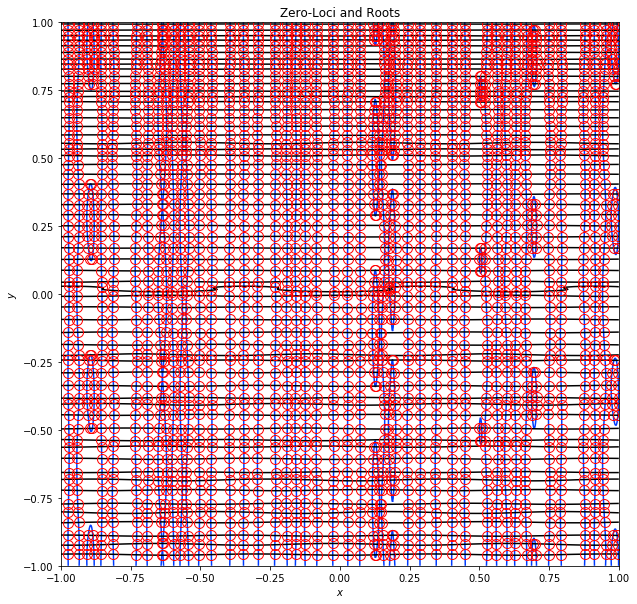

CPU times: user 1min 14s, sys: 978 ms, total: 1min 15s
Wall time: 1min 15s


In [106]:
#find common roots
low = -np.ones(2)
upp = np.ones(2)
%time zeros = yr.solve([fx,fy],low,upp,plot=True, polish=False)

Should be 2720 zeros

In [ ]:
Percent Finished: 100%         
Total intervals checked was 34456
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [32.45 59.26  0.    8.29]
CPU times: user 1min 7s, sys: 951 ms, total: 1min 8s
Wall time: 1min 10s

In [107]:
#how many zeros it found
zeros.shape

(2720, 2)

In [108]:
#maximum residuals of common roots
np.max(np.abs(fx(zeros[:,0],zeros[:,1]))),np.max(np.abs(fy(zeros[:,0],zeros[:,1])))

(9.923426448395223e-05, 9.914618824741206e-05)

In [112]:
#evaluate at critical points
values = f(zeros[:,0],zeros[:,1])
#report mimima and minimizers
mimimizer = np.argmin(values)
values[mimimizer], zeros[mimimizer][0], zeros[mimimizer][1]

(-3.3068686474750946, -0.024403086600881568, 0.21061242716779954)

In [113]:
x,y = [-.0244030796943751719036133083297, .210612427155355770591591100555]
f(x,y)

-3.3068686474752367

YRoots can solve systems in higher dimensions as well. Moving forward, our goal is to increase rootfinding feasibility for high dimensional systems.

Here are examples of YRoots running on systems in three and four variables.

### Three variables, Domain $[-1,1]\times[-1,1]\times[-1,1]$

$$ f(x,y,z) = sin(5x+y+z)$$
$$ g(x,y,z) = sin(xyz)$$
$$ h(x,y,z) = x^2 + y^2 - z^2 - 1$$


In [114]:
#define the functions and the search domain
f = lambda x,y,z : np.sin(5*x+y+z)
g = lambda x,y,z : np.sin(x*y*z)
h = lambda x,y,z : x**2+y**2-z**2-1
a = -np.ones(3)
b = np.ones(3)

In [115]:
#solve and time
%time roots = yr.solve([f,g,h], a, b, polish=True)
#show the number of roots and maximal residuals
roots.shape[0],np.max(np.abs(f(*[roots[:,i] for i in range(3)]))),np.max(np.abs(g(*[roots[:,i] for i in range(3)]))),np.max(np.abs(h(*[roots[:,i] for i in range(3)])))

Percent Finished: 100%         
CPU times: user 10.4 s, sys: 137 ms, total: 10.5 s
Wall time: 5.81 s


(6, 7.657137397853899e-16, 6.064440122876017e-16, 1.3322676295501878e-15)

Should be 6 zeros

In [116]:
roots
#TODO: Why are we missing roots here when we found them before?
# When we set real_tol of good_zeros_nd to 1.e-1, we get 5 of the six and a bunch of duplicates...

array([[ 4.49680650e-01,  8.93189405e-01,  1.43619962e-16],
       [ 7.58624217e-01, -6.51528432e-01, -1.08396445e-16],
       [ 1.96116135e-01, -9.80580676e-01,  2.04768285e-16],
       [-1.96116135e-01,  9.80580676e-01,  8.76385283e-16],
       [-7.58624217e-01,  6.51528432e-01, -1.22696066e-15],
       [-4.49680650e-01, -8.93189405e-01, -9.77868677e-16]])

The code below graphs these level surfaces and their common roots (code is from [here](https://stackoverflow.com/questions/4680525/plotting-implicit-equations-in-3d)).

/Users/erikhalesparkinson/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


(-1, 1)

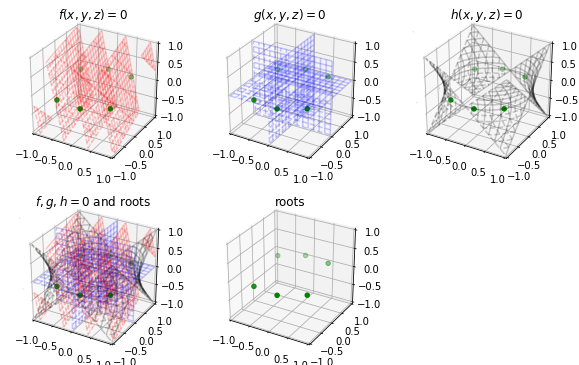

In [117]:
#function for plotting level surfaces in 3D
def plot_implicit(fn, color, bbox=(-1,1)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.linspace(xmin, xmax, 15) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], colors=color,alpha=.2,zdir='z')
        # [z] defines the only level to plot for this contour for this value of z

    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], colors=color,alpha=.2,zdir='y')

    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], colors=color,alpha=.2,zdir='x')

    #set plot limits
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)
    
#plot each level surface individually, then together

#f
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(631, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
plot_implicit(f,'r')
ax.set_title('$f(x,y,z)=0$')

#g
ax = fig.add_subplot(632, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
plot_implicit(g,'b')
ax.set_title('$g(x,y,z)=0$')

#h
ax = fig.add_subplot(633, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
plot_implicit(h,'k')
ax.set_title('$h(x,y,z)=0$')

#together
ax = fig.add_subplot(634, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
plot_implicit(f,'r')
plot_implicit(g,'b')
plot_implicit(h,'k')
ax.set_title('$f,g,h = 0$ and roots')

#just the roots
ax = fig.add_subplot(635, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
ax.set_title('roots')
ax.set_zlim3d(-1,1)
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)

## Four Variable Optimization

As a final multivariate example, we solve the following system.

$$\cos(x_1) + x_4 = 1$$
$$\cos(x_2) + x_3 = 2$$
$$\cos(x_3) + x_2 = 3$$
$$\cos(x_4) + x_1 = 4$$

In [118]:
#functions
f1 = lambda x1, x2, x3, x4: np.cos(x1) + x4 - 1
f2 = lambda x1, x2, x3, x4: np.cos(x2) + x3 - 2
f3 = lambda x1, x2, x3, x4: np.cos(x3) + x2 - 3
f4 = lambda x1, x2, x3, x4: np.cos(x4) + x1 - 4

#domain
a = [4,3.5,2,1.5]
b = [4.5,4,3,2]

#solve
yr.solve([f1,f2,f3,f4],a,b,polish=True)

#TODO: this seems like bug/weird case for 4D systems

Percent Finished: 100%       


array([[4.04674914, 3.91158389, 2.71791677, 1.61756251]])

Should be 1 zero

### Univariate Functions

The `yr.solve` method can also be used to quickly find the roots of a univariate function. In this case, `a` and `b` can simply be entered as floats, and the `funcs` does not need to be a list.

As an example, we find the zeros of $f(x) = \sin(e^{3x})$ on $[-1,2]$.

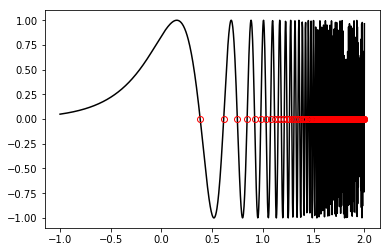

CPU times: user 371 ms, sys: 11.4 ms, total: 383 ms
Wall time: 231 ms


(128, 0.0004056404618097104)

In [125]:
#define the function and search interval
f = lambda x : np.sin(np.exp(3*x))

a = -1
b = 2

#solve and time
%time roots = yr.solve(f, a, b, plot=True)
#show the number of roots and maximal residuals
roots.size,np.max(np.abs(f(roots)))

Should be 128 zeros

## Polynomials

When a function in a system is a polynomial, it may be useful to pass it in as a YRoots's `Polynomial` object. `Polynomial` objects may be more cumbersome to create, but they have a special `evaluate_grid` method which allows for faster Chebyshev-approximations.

If the system only includes `Polynomial` objects, it may be preferable to use the alternative `yr.polysolve` method which does not rely on Chebyshev approximations. The gains in speed depend on the degree and dimension of the system. Heuristically, these methods are faster than `yr.solve` for lower degree polynomial systems, but **these methods are only stable for roots where each coordinate has absolute value $< 1$.**

We demonstrate how to create `Polynomial` objects and how to use `yr.polysolve`.

### YRoot Polynomials

The two types of `Polynomial` objects are `MultiPower` and `MultiCheb`, corresponding to multivariate polynomials in the power basis and Chebyshev basis respectively. 
Polynomials in $n$-dimensions are represented by an $n$-dimensional array of coefficients. For a system with three variables, the $(i,j,k)$ spot in the coefficient tensor corresponds to the coefficients of $x^iy^jz^k$ in the power basis or $T_i(x)T_j(y)T_k(z)$ in the Chebyshev basis. It is probably easiest to construct this coefficient tensor by initializing a tensor of zeros and then setting each nonzero coefficient to the correct value.

For example, $f(x,y) = 5x^3 + 4 xy^2 + 3x^2 + 2y^2 + 1$ would be initialized as 
```python
coeff = np.zeros((4,4)) #4x4 matrix because it's a degree 3 polynomial
coeff[3,0] = 5
coeff[1,2] = 4
coeff[2,0] = 3
coeff[0,2] = 2
coeff[0,0] = 1
f = yr.MultiPower(coeff)```
                         
and $g(x,y,z) = 3T_1(x)T_2(y) + 5 T_2(z) + 2$ would be initialized as

```python
coeff = np.zeros((4,4,4))
coeff[1,2,0] = 3
coeff[0,0,5] = 5
coeff[0,0,0] = 2
g = yr.MultiCheb(coeff)```

### Polysolve

The function `yr.polysolve` has many options for polynomial rootfinding, but the default parameters are the most robust for most systems. The syntax is

```python
yr.polysolve(polys)```

where `polys` is a list of polynomial objects. All of the polynomials must be represented in the same basis. For systems that come from Chebyshev approximations, it may be better to add the optional parameter `MSmatrix=-1`.

As mentioned above, Polysolve is **only stable for finding roots where each coordinate has absolute value $< 1$.** Other roots near this region may be accurate, but how far away you can go before loosing accuracy depends on the degrees of the polynomials. By default, the system returns all the roots. To return only the roots which are guaranteed to be computed stably, use the optional parameter `return_all_roots=False`.

Additionally, while `yr.solve` only finds real roots, `yr.polysolve` finds complex roots as well. 

Below, we find the common roots of 

$$f(x,y) = y^2 + 3xy - 4x +1$$
$$g(x,y) = -6xy -2x^2 + 6y +3.$$


In [126]:
#direct construction of polynomials with coefficient tensors
f = yr.MultiPower(np.array([[1, -4, 0],[0, 3, 0],[1, 0, 0]]))
g = yr.MultiPower(np.array([[3, 0, -2],[6, -6, 0],[0, 0, 0]]))

#solve and time
%time roots = yr.polysolve([f,g], return_all_roots=True)
#show the number of roots and maximal residuals
roots.shape[0],np.max(np.abs(f(roots))),np.max(np.abs(g(roots)))

CPU times: user 3.61 ms, sys: 1.44 ms, total: 5.05 ms
Wall time: 6.59 ms


(4, 7.993605777301127e-14, 6.039613253960852e-14)

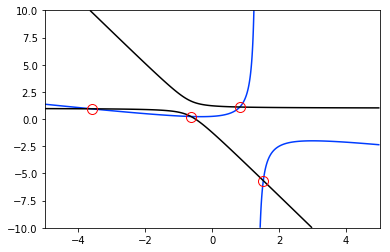

In [127]:
#plot f,g and roots
x = np.linspace(-5,5,1000)
y = np.linspace(-10,10,1000)
X,Y = np.meshgrid(x,y)
plt.contour(X,Y,f(np.array(list(zip(X,Y)))),levels=[0],colors='#003cff')
plt.contour(X,Y,g(np.array(list(zip(X,Y)))),levels=[0],colors='k')
plt.plot(roots[:,0],roots[:,1],'o',color='none',markeredgecolor='r',markersize=10)

In this case, the polynomias are of low degree, so even the roots outside the interval $[-1,1]\times[-1,1]$ are accurate.

We now find the common roots of the randomly generated polynomials higher degree polynomials A and B. In the first case, we return all the complex roots Polyroots found, and in the second we only return roots in the unit box.

In [262]:
from yroots import MultiCheb
def polyList(deg,dim,power):
    deg += 1
    coeffs = list()
    for i in range(dim):
        coeffs.append(np.random.standard_normal(deg*np.ones(dim, dtype = int)))
    for i,j in np.ndenumerate(coeffs[0]):
        if np.sum(i) >= deg:
            for coeff in coeffs:
                coeff[i] = 0
    polys = list()
    if power:
        for coeff in coeffs:
            polys.append(MultiPower(coeff))
    else:
        for coeff in coeffs:
            polys.append(MultiCheb(coeff))
    return polys
deg, dim, power = 10,3,False
polys = polyList(deg, dim, power)

In [263]:
%time roots = yr.polysolve(polys, return_all_roots=True)

CPU times: user 1min 21s, sys: 2.31 s, total: 1min 23s
Wall time: 55.8 s


In [273]:
a,b = np.array([-1.]*dim), np.array([1.]*dim)
%time sub_roots = yr.solve(polys, a, b)

[[[ 1.68232561e+00  1.15173968e+00  1.52073462e-01  5.50578437e-03
    2.29367476e-04]
  [-4.30990240e-01 -1.69589173e-01 -8.09086001e-03 -6.14634235e-04
    0.00000000e+00]
  [ 8.19657431e-02 -1.02221965e-02 -3.05240444e-04  0.00000000e+00
    0.00000000e+00]
  [ 4.11718489e-03 -1.91816076e-04  0.00000000e+00  0.00000000e+00
    0.00000000e+00]
  [ 8.46189018e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00]]

 [[-3.92402627e-01  1.62538971e-01  1.08916634e-02  3.56020411e-04
    0.00000000e+00]
  [-8.69500979e-02  7.97483928e-03  5.62981725e-04  0.00000000e+00
    0.00000000e+00]
  [ 9.70846956e-04  1.39888486e-04  0.00000000e+00  0.00000000e+00
    0.00000000e+00]
  [ 2.86174972e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00]]

 [[-1.33912183e-01  8.60562986e-05  1.09045059e-04  0.00000000e+00
    0.00000000e+00]
  [-5.12233253e-03 -9.72971537e-05  0.0

[[[ 8.60925907e-02  1.96516457e-01  1.23296347e-02  1.25746691e-04]
  [-2.74272678e-01 -1.21305527e-02 -1.73251825e-04  0.00000000e+00]
  [ 4.42333118e-03 -2.40190308e-04  0.00000000e+00  0.00000000e+00]
  [ 8.68729996e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[ 4.00797338e-01  1.17597419e-02  2.09631983e-04  0.00000000e+00]
  [-2.80284221e-03  2.19048046e-04  0.00000000e+00  0.00000000e+00]
  [ 2.50285085e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[-1.21714251e-03  7.57797191e-05  0.00000000e+00  0.00000000e+00]
  [-1.02438382e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[-7.92764521e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.0000

[[[-4.70641505e-01  1.17085949e-01  8.01662215e-03  8.12614020e-05]
  [-1.81170173e-01 -8.44082902e-03 -1.21119123e-04  0.00000000e+00]
  [ 2.93988012e-03 -1.62792310e-04  0.00000000e+00  0.00000000e+00]
  [ 5.81946329e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[ 2.58619471e-01  7.08926178e-03  1.29102948e-04  0.00000000e+00]
  [-1.29074339e-03  1.40813671e-04  0.00000000e+00  0.00000000e+00]
  [ 1.61385513e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[-2.11511655e-04  4.81675587e-05  0.00000000e+00  0.00000000e+00]
  [-5.77081586e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[-3.92594417e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.0000

[[[-3.07381550e-01  1.77464926e-01  4.34956577e-03  2.30266569e-05]
  [-2.41752560e-01 -4.22361471e-03 -3.60099131e-05  0.00000000e+00]
  [ 1.12221504e-03 -4.67786625e-05  0.00000000e+00  0.00000000e+00]
  [ 1.64483416e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[ 2.87488756e-01  3.69975893e-03  3.37306365e-05  0.00000000e+00]
  [-5.18103054e-04  4.14852905e-05  0.00000000e+00  0.00000000e+00]
  [ 4.96691060e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[ 1.87696967e-04  1.40345597e-05  0.00000000e+00  0.00000000e+00]
  [-1.62286006e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[-9.71194025e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.0000

KeyboardInterrupt: 

# Hey, it was good to see you at the soccer game! I was thinking it’d be fun to hang out sometime, but I just realized I don’t have your number! Mine is 301-846-8111,  you should text me so I have yours and we should hang out!

In [302]:
78/85

0.9176470588235294

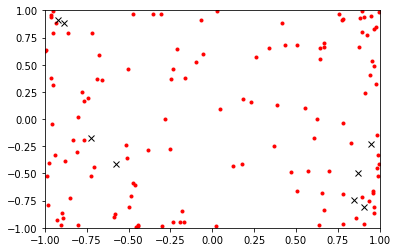

In [265]:
#plot only the real roots
real_roots = np.real(roots[np.all(np.abs(roots.imag) < 1.e-10,axis = 1)])
real_roots = real_roots[np.all(np.abs(real_roots.real) < 1.,axis = 1)]
plt.plot(real_roots[:,0], real_roots[:,1],'r.')
plt.plot(sub_roots[:,0], sub_roots[:,1],'kx')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

In [266]:
sub_roots.shape, real_roots.shape

((8, 3), (128, 3))

In [301]:
from yroots.subdivision import interval_approximate_1d
f = lambda x: np.sin(x)
interval_approximate_1d(f, -.001, .001, 5)

[ 1.          0.80901704  0.30901704 -0.30901704 -0.80901704 -1.
 -0.80901704 -0.30901704  0.30901704  0.80901704]


array([-2.77555756e-17,  1.00000004e+00,  2.77555756e-17, -4.16666709e-08,
        0.00000000e+00,  5.27355937e-16])

In [128]:
#get two random 2D polynomials of a certain degree in the power basis
degree = 20
np.random.seed(23)
A = yr.MultiPower(np.random.rand(degree,degree))
B = yr.MultiPower(np.random.rand(degree,degree))

#A and B will have roots at infinity (which yr.polysolve cannot yet handle) 
# unless their coefficient matrices are upper left triangular
A = yr.MultiPower(np.fliplr(np.triu(np.fliplr(A.coeff))))
B = yr.MultiPower(np.fliplr(np.triu(np.fliplr(B.coeff))))

In [129]:
#All roots
#solve and time
%time roots = yr.polysolve([A,B], return_all_roots=True)
#show the number of roots and maximal residuals
roots.shape[0],np.max(A(roots)),np.max(B(roots))

CPU times: user 381 ms, sys: 32.7 ms, total: 413 ms
Wall time: 262 ms


(341,
 (0.16238029141095467+0.08617783267618506j),
 (0.2510953536257148+0.17556067493626415j))

In [130]:
#Roots in unit box
#solve and time
%time accurate_roots = yr.polysolve([A,B],return_all_roots=False)
#show the number of roots and maximal residuals
accurate_roots.shape[0],np.max(A(accurate_roots)),np.max(B(accurate_roots))

CPU times: user 422 ms, sys: 15.8 ms, total: 438 ms
Wall time: 244 ms


(110,
 (3.38584715819934e-12+2.8964053377933396e-12j),
 (1.3321566072477253e-12+1.4426237981979284e-12j))

Clearly, roots in the unit interval are more accurate for these higher degree systems. Still, real roots outside the region are visually perfect.

array([[-0.04542403+0.j, -1.12553814+0.j],
       [ 0.57896567-0.j, -1.31114742-0.j],
       [-0.38087033+0.j, -0.43197629+0.j],
       [ 0.98242469+0.j, -1.11103665+0.j],
       [ 1.26050846-0.j, -1.25135341-0.j],
       [-1.58862671-0.j,  1.66014418-0.j],
       [-0.96512672+0.j,  0.76684634+0.j]])

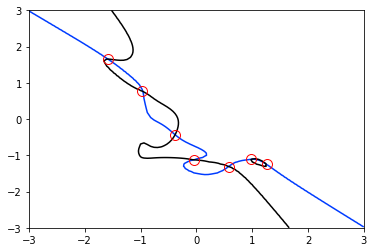

In [131]:
#plot A,B and real roots
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)
X,Y = np.meshgrid(x,y)
plt.contour(X,Y,A(np.array(list(zip(X,Y)))),levels=[0],colors='#003cff')
plt.contour(X,Y,B(np.array(list(zip(X,Y)))),levels=[0],colors='k')
#plot only the real roots
real_roots = roots[np.all(np.abs(roots.imag) < 1.e-10,axis = 1)]
plt.plot(np.real(real_roots[:,0]),np.real(real_roots[:,1]),'o',color='none',markeredgecolor='r',markersize=10)
real_roots

# Logo attempt...

In [132]:
#making logo
one = lambda x,y: (y-.8)*(10*x+2.3)-.06*(2.5*x+2.3)**3+2+.2*np.sin(50*x)+.2*np.cos(50*y)
two = lambda x,y: (y-.8)*(-10*x+2.3)-.06*(-2.5*x+2.3)**3+2+.2*np.sin(50*x)+.2*np.cos(50*y)

Percent Finished: 100%         
Total intervals checked was 325
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [77.23 20.62  0.    2.15]


<Figure size 7200x4800 with 0 Axes>

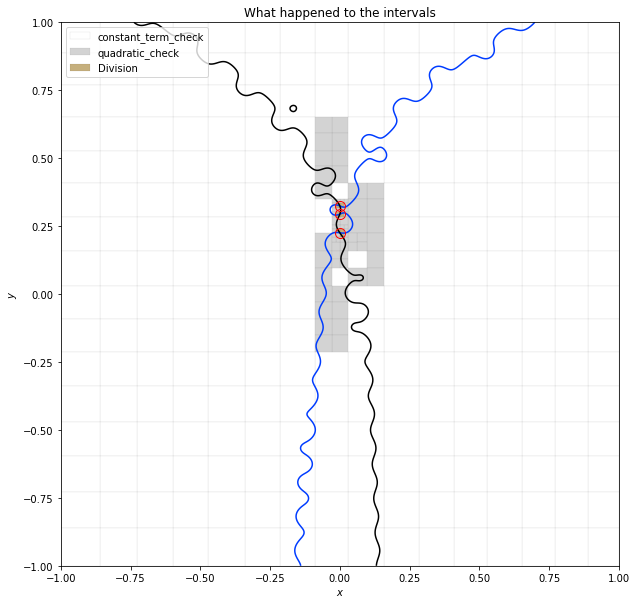

(3, 1.131229613343665e-06, 1.182275487476847e-05)

In [133]:
#TODO: why is there an extra root?
# the roots it finds seem off enough that polishing makes them disappear since
# they were found by the wrong division solver.
# Maybe this is just an ill-conditioned problem
zeros = yr.solve([one,two],-np.ones(2),np.ones(2),plot=True,plot_intervals=True, polish=False)
#show the number of roots and maximal residuals
zeros.shape[0],np.max(np.abs(one(zeros[:,0],zeros[:,1]))),np.max(np.abs(two(zeros[:,0],zeros[:,1])))

In [134]:
#functions for zooming in
def get_interval_2d(steps):
    RAND = 0.5139303900908738
    a = np.array([-1.]*2)
    b = np.array([1.]*2)
    for step in steps:
        diffs1 = ((b-a)*RAND)
        diffs2 = ((b-a)-(b-a)*RAND)
        if step == 0:
            a += diffs1
        elif step == 1:
            a[0] += diffs1[0]
            b[1] -= diffs2[1]
        elif step == 2:
            b[0] -= diffs2[0]
            a[1] += diffs1[1]
        elif step == 3:
            b -= diffs2
    return a,b

In [135]:
a,b = get_interval_2d([2,1,0,1,1])
a,b

(array([-0.02951494,  0.28462651]), array([0.02786078, 0.34876812]))

Percent Finished: 100%       
Total intervals checked was 16
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [ 0. 75.  0. 25.]


<Figure size 7200x4800 with 0 Axes>

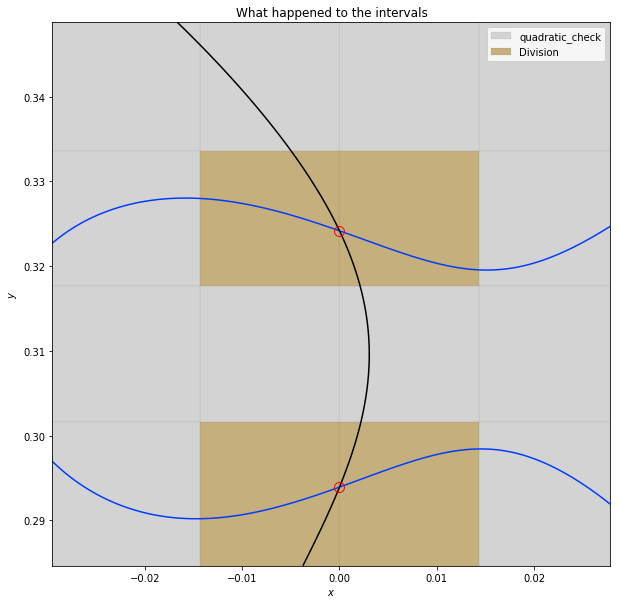

In [136]:
zeros = yr.solve([one,two],a,b,plot=True,plot_intervals=True, polish=False)
#show the number of roots and maximal residuals
#zeros.shape[0],np.max(np.abs(one(zeros[:,0],zeros[:,1]))),np.max(np.abs(two(zeros[:,0],zeros[:,1])))

In [137]:
def get_interval_3d(steps,a=-np.ones(3),b=np.ones(3)):
    RAND = 0.5139303900908738
    for step in steps:
        diffs1 = ((b-a)*RAND)
        diffs2 = ((b-a)-(b-a)*RAND)
        if step == 0:
            a += diffs1
        elif step == 1:
            a[0] += diffs1[0]
            a[1] += diffs1[1]
            b[2] -= diffs2[2]
        elif step == 2:
            a[0] += diffs1[0]
            b[1] -= diffs2[1]
            a[2] += diffs1[2]
        elif step == 3:
            b[0] -= diffs2[0]
            a[1] += diffs1[1]
            a[2] += diffs1[2]
        elif step == 4:
            a[0] += diffs1[0]
            b[1] -= diffs2[1]
            b[2] -= diffs2[2]
        elif step == 5:
            b[0] -= diffs2[0]
            a[1] += diffs1[1]
            b[2] -= diffs2[2]
        elif step == 6:
            b[0] -= diffs2[0]
            b[1] -= diffs2[1]
            a[2] += diffs1[2]
        elif step == 7:
            b -= diffs2
    return a,b